# Projeto 1 - Ciência dos Dados

Nome: Gustavo Pinheiro de Carvalho

Nome: Maria Eduarda Matta Mercer Mourão

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [303]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [304]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gustavopinheiro/P1-CD21-1


### Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [332]:
filename = 'Xiaomi.xlsx'

In [333]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,1
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",0
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,0
3,@10icarocaldas por esse preço tu comprar o xia...,0
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,0


In [334]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",0
1,a xiaomi me prometeu qualidade,0
2,algum sugar daddy on pra me dar o robo aspirad...,0
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",0
4,meu celular ja ta em fim de carreira n vejo a ...,0


### Definindo as variáveis qualitativas como categóricas

#### Treinamento

In [335]:

train.Classificação = train.Classificação.astype('category')
train.Classificação.cat.categories = ('Irrelevnte', 'Relevante')
train.head(10)

,Treinamento,Classificação
0,@baixinho04 xiaomi seria uma boa opção. eu ten...,Relevante
1,"ainda bem q tenho xiaomi e ele tá cm 73%, dura...",Irrelevnte
2,@tetenc555 @naegiwcat eu vó compra um xiaomi r...,Irrelevnte
3,@10icarocaldas por esse preço tu comprar o xia...,Irrelevnte
4,vcs que tem xiaomi sabiam que dá p/ usar o you...,Irrelevnte
5,@10icarocaldas xiaomi é o melhor celular custo...,Relevante
6,"@_lucast7 @g1 verdade, mas pelo menos o preço ...",Irrelevnte
7,a xiaomi lançou um celular com a acabamento em...,Irrelevnte
8,@mathmj @madunixs @affectionmauro xiaomi alem ...,Relevante
9,@nn_carvalhosa @g1 no caso da xiaomi o consumi...,Irrelevnte


#### Teste

In [336]:
test.Classificação = test.Classificação.astype('category')
test.Classificação.cat.categories = ('Irrelevante', 'Relevante')
test.head(10)

,Teste,Classificação
0,"@luffyoficial_ entt amg, omo eu ainda não ten...",Irrelevante
1,a xiaomi me prometeu qualidade,Irrelevante
2,algum sugar daddy on pra me dar o robo aspirad...,Irrelevante
3,"@xiaomibrasil me salva aí, xiaomi com os bugs....",Irrelevante
4,meu celular ja ta em fim de carreira n vejo a ...,Irrelevante
5,a xiaomi mi band 6 estará mesmo a chegar?\nhtt...,Irrelevante
6,xiaomi não decepciona em nada 👏,Relevante
7,@wos4you vai ser o mesmo lugar q eu vou mandar...,Irrelevante
8,@kaiiirtss xiaomi sksksks,Irrelevante
9,@jopedrobf gastou dinheiro atoa... a não ser q...,Irrelevante


### Estudo dos valores e quantidades de tweets de cada classificação

#### Treinamento

In [337]:
train.Classificação.value_counts(True)

Irrelevnte    0.733333
Relevante     0.266667
Name: Classificação, dtype: float64

In [338]:
train_classificacao = train.Classificação.value_counts()
i=0
for title, var_quanti in (('Irrelevante', train_classificacao[0]), ('Relevante', train_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {train_classificacao[i]}')
    i += 1

-------------------------------------------------------
Irrelevante
-------------------------------------------------------
contagem               = 220
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 80


##### Gráfico

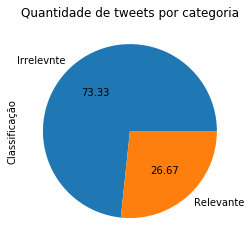

In [339]:
train_classificacao = train.Classificação.value_counts()
train_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

#### Teste

In [340]:
test.Classificação.value_counts(True)

Irrelevante    0.643333
Relevante      0.356667
Name: Classificação, dtype: float64

##### Gráfico

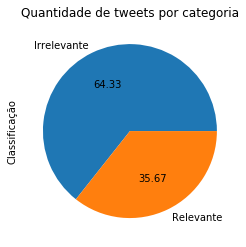

In [341]:

test_classificacao.plot(kind='pie', title='Quantidade de tweets por categoria', autopct="%.2f")

In [342]:
test_classificacao = test.Classificação.value_counts()
i=0
for title, var_quanti in (('Irrelevante', test_classificacao[0]), ('Relevante', test_classificacao[1])):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {test_classificacao[i]}')
    i += 1

-------------------------------------------------------
Irrelevante
-------------------------------------------------------
contagem               = 193
---------------------------------------------
Relevante
---------------------------------------------
contagem               = 107


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

 A marca escolhida para o classificador Naive-Bayes foi a Xiaomi, empresa chinesa de eletrônicos que divide opiniões a respeito da qualidade e da aceitabilidade dos seus produtos no mercado brasileiro. 

Consideramos como relevantes todos aqueles tweets que expressavam opiniões dos usuários e consumidores sobre os produtos da marca, tanto positivos como negativos. Assim, podemos selecionar os tweets que podem apontar a situação atual da marca, e também os problemas e acertos nos produtos comercializados nacionalmente.

Como estamos obtendo nossas informações do Twitter, decidimos considerar como não relevantes os tweets que não expressavam nenhum tipo de opinião, ou aqueles que eram a respeito de sorteios e premiações, algo bem comum dentro dessa plataforma.

Portanto, durante a análise, encontramos a necessidade de cálculas as seguintes probabilidades para que nosso classificador desempenhasse a função desejada:

- $P(Tweet|Classificação)$: probabilidade do tweet pertencer a categoria Relevante;
- $P(Classificação)$: probabilidade da categoria dentre o total de tweets (TREINAMENTO);
- $P(Tweet)$: probabilidade de uma frase ocorrer na língua portuguesa. XXX
- $P(Palavra|Classificação)$: probabilidade de uma palavra ser de dada categoria;
- $P(Classificação|Tweet)$: probabilidade de dado tweet ser classificado com alguma das categorias;

Para fazer o cálculo das probabilidades, começamos com o básico do Naive-Bayes:

$$P(Classificação)=\frac{∑(PalavrasDaClassificação)}{∑(PalavrasDoVocabulário)}\hspace{3cm}\mbox{(I)}$$

Onde a probabilidade de um tweet ser de dada classificação P(Tweet|Classificação) seria calculado pela probabilidade de classificação de cada palavra (ou emoji) presente no tweet.

$$P(Tweet|Classificação) = P(Palavra1|Classificação)*P(Palavra2|Classificação)*P(Palavra3|Classificação)\hspace{3cm}\mbox{(II)}$$

Onde a probabilidade de uma dessas palavras pertencencer a uma dada classificação ficaria definida por:

$$P(Palavra|Classificação) = \frac{∑(ApariçõesDaPalavraNaClassificação)}{∑(PalavrasDaClassificação)}\hspace{3cm}\mbox{(III)}$$

Para que a probabilidade de uma dada palavra ser classificada por uma das categorias fosse calculada, surgiu um grande problema: O que aconteceria caso surgisse uma palavra nova que não estivesse previamente inserida em uma das categorias?

Entra ai a necessidade de aplicarmos o 'La Place Smoothing', que é justamente uma técnica que lida com a possibilidade de uma probabilidade de uma palavra que não esta no treinamento receber probabilidade zero. Podemos representar P(Palavra|Classificação) por:

$$P(Palavra|Classificação)=\frac{∑(ApariçõesDaPalavraNaClassificação)+1}{∑(PalavrasDaClassificação) + ∑(Vocabulário)}\hspace{3cm}\mbox{(IV)}$$

Assim, podemos calcular a probabilidade de um tweet ser categorizado com umas das categorias:

$$P(Classificação|Tweet) = P(PalavrasNoTweet|Classificação)*P(Classificação)\hspace{3cm}\mbox{(V)}$$

### Função de limpeza dos tweets:

In [343]:
import re
#stop_words = stopwords.words("english")
# A ideia de remover as 'stop words' é retirar as palavras que não tem conrtribuição de significado para o texto.

def cleanup(tweet_og):
    tweet = re.sub(r'http\S+', '', tweet_og, flags=re.MULTILINE) # Remove as URL
    tweet = " ".join(re.findall("(\w+|[^\w ]+)",tweet_og)) # Adiciona espaços entre os Emojis
    tweet = re.sub(re.compile("""[!-',.:)"(?;#@]"""), '', tweet_og) # Remove as pontuações
    tweet = re.sub('\s{2,}', ' ', tweet_og) # Remove espaços múltiplos
    tweet = re.sub('#\S+', ' ', tweet_og) # Remove Hashtags
    tweet = re.sub('@\S+', ' ', tweet_og) # Remove menções de usuários
    tweet = re.sub('\n','',tweet_og) #Remove '\n'
    tweet = re.sub('rt','',tweet_og) #Remove os 'rt'
    tweet = tweet_og.lower() # Transforma o texto em letras minúsculas
    
    
    return tweet


#### Teste funçao de limpeza:

In [344]:
tweet_teste = 'Xiaomi é muito boa 👏, kkkkkkk mesmooo'
tweet_teste = cleanup(tweet_teste)
tweet_teste = tweet_teste.split()
print(tweet_teste)

['xiaomi', 'é', 'muito', 'boa', '👏,', 'kkkkkkk', 'mesmooo']


___
### Montando um Classificador Naive-Bayes

A ideia de criar uma classe para o nosso Classificador Naive-Bayes é que poderemos utiliza-la para diferentes datasets 

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [345]:
# Classificador Naive Bayes Primário:

# Aplicando função de limpeza

relevante = []
irrelevante = [] 

for tweet in range(len(train.Treinamento)):
    tweet_treinamento = cleanup(train.Treinamento[tweet]).split()
    for palavra in tweet_treinamento:
         if palavra[0] == '@' or palavra[:5] == 'https':
            tweet_treinamento.remove(palavra)
    
#print(tweet_treinamento)
    

    for i in range(len(tweet_treinamento)):
        if train.Classificação[tweet] == 'Relevante':
            relevante.append(tweet_treinamento[i])
        else:# train.Classificação[tweet] == 'Irrelevante':
            irrelevante.append(tweet_treinamento[i])
            
print(irrelevante)

# Cálculo e contagem de palavras ("dicionário com todas as palavras da planilha TREINAMENTO)

# for classificacao in train['Classificação']:
#     if classificacao == 'Relevante':
#         lista_probabilidade.append(classificacao)
#     elif classificacao == 'Irrelevante':
#         lista_probabilidade.append(classificacao)

['ainda', 'bem', 'q', 'tenho', 'xiaomi', 'e', 'ele', 'tá', 'cm', '73%,', 'dura', 'até', '2025', '@naegiwcat', 'eu', 'vó', 'compra', 'um', 'xiaomi', 'redminote', '9', 'por', 'esse', 'preço', 'tu', 'comprar', 'o', 'xiaomi', 'redmi', 'note', '10', 'vcs', 'que', 'tem', 'xiaomi', 'sabiam', 'que', 'dá', 'p/', 'usar', 'o', 'youtube', 'como', 'se', 'fosse', 'youtube', 'premium', 'de', 'graça????', 'descobri', 'agora', '@g1', 'verdade,', 'mas', 'pelo', 'menos', 'o', 'preço', 'dos', 'fones', 'sem', 'fio', 'da', 'xiaomi', 'são', '100', 'conto,', 'os', 'da', 'apple', 'são', '1k', '😂', 'a', 'xiaomi', 'lançou', 'um', 'celular', 'com', 'a', 'acabamento', 'em', 'glitter', 'kkkkkk', 'leve', 'todo', 'meu', 'dinheiro', 'por', 'favor', '@g1', 'no', 'caso', 'da', 'xiaomi', 'o', 'consumidor', 'poderá', 'escolher', 'se', 'o', 'carregador', 'vem', 'ou', 'não', 'na', 'caixa.', 'um', 'tijolo', 'xiaomi', 'né', 'amada', 'xiaomi', 'mi', 'stick', 'versão', 'global', '(aliexpress)', 'r$133,63', '(6x', 'sem', 'juros)

In [346]:
relevante
serie_relevante = pd.Series(relevante)
serie_relevante.head(10)

0      xiaomi
1       seria
2         uma
3         boa
4      opção.
5          eu
6       tenho
7    motorola
8           e
9           a
dtype: object

In [347]:
tabela_relevante = serie_relevante.value_counts()
tabela_relevante

xiaomi       70
o            49
e            42
é            38
eu           37
             ..
aconteceu     1
huawei.       1
geral,        1
kindle        1
mta           1
Length: 627, dtype: int64

In [348]:
tabela_relevante_relativa = serie_relevante.value_counts(True)
tabela_relevante_relativa

xiaomi       0.046698
o            0.032688
e            0.028019
é            0.025350
eu           0.024683
               ...   
aconteceu    0.000667
huawei.      0.000667
geral,       0.000667
kindle       0.000667
mta          0.000667
Length: 627, dtype: float64

In [349]:
irrelevante
serie_irrelevante = pd.Series(irrelevante)
serie_irrelevante.head(10)

0     ainda
1       bem
2         q
3     tenho
4    xiaomi
5         e
6       ele
7        tá
8        cm
9      73%,
dtype: object

In [350]:
tabela_irrelevante = serie_irrelevante.value_counts()
tabela_irrelevante

xiaomi              179
o                    92
e                    77
de                   73
da                   71
                   ... 
@btspurplebullet      1
nível                 1
shark                 1
📱📱📱📱📱                 1
td                    1
Length: 1655, dtype: int64

In [351]:
tabela_irrelevante_relativa = serie_irrelevante.value_counts(True)
tabela_irrelevante_relativa

xiaomi              0.044694
o                   0.022971
e                   0.019226
de                  0.018227
da                  0.017728
                      ...   
@btspurplebullet    0.000250
nível               0.000250
shark               0.000250
📱📱📱📱📱               0.000250
td                  0.000250
Length: 1655, dtype: float64

In [354]:
serie_vocabulario = pd.Series(relevante + irrelevante)
tabela_vocabulario = np.unique(serie_vocabulario)
tabela_vocabulario

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  25,  26,  27,  28,
        30,  32,  33,  37,  40,  51,  54,  55,  76,  87,  88,  94, 106,
       119, 141, 249])

In [355]:

tabela_vocabulario_relativa

xiaomi     0.045240
o          0.025618
e          0.021621
de         0.019259
que        0.017078
             ...   
voltou     0.000182
5000mah    0.000182
1.100      0.000182
ascenda    0.000182
td         0.000182
Length: 2026, dtype: float64

In [357]:
# Cálculo e contagem de palavras:
        
palavras_relevante = [[palavra, relevante.count(palavra)] for palavra in set(relevante)]
palavras_irrelevante = [[palavra, irrelevante.count(palavra)] for palavra in set(irrelevante)]
vocabulario = np.unique(palavras_relevante + palavras_irrelevante)

#print(palavras_relevante)
        
print('Total de palavras:', len(vocabulario))
print('Total de palavras relevantes:', len(palavras_relevante))
print('Total de palavras não relevantes:', len(palavras_irrelevante))

Total de palavras: 2056
Total de palavras relevantes: 627
Total de palavras não relevantes: 1655


In [326]:
# Limpando as planilhas teste:
            
for tweet in range(len(test.Teste)):
    tweet_test = cleanup(test.Teste[tweet]).split()
    
    print(tweet_test)           

['@luffyoficial_', 'entt', 'amg,', 'omo', 'eu', 'ainda', 'não', 'tenho', 'meu', 'próprio', 'dinheiro,', 'minha', 'mãe', 'disse', 'que', 'eu', 'poderia', 'pegar', 'um', 'por', 'até', '1400,', 'e', 'é', 'difícil', 'achar', 'um', 'celular', 'atual,', 'e', 'que', 'seja', 'bom', 'para', 'o', 'que', 'eu', 'quero,', 'mas', 'infelizmente', 'é', 'minha', 'única', 'opção', 'agr.', 'e', 'ai', 'eu', 'achei', 'o', 'xiaomi,', 'mas', 'ainda', 'estou', 'receosa.']
['a', 'xiaomi', 'me', 'prometeu', 'qualidade']
['algum', 'sugar', 'daddy', 'on', 'pra', 'me', 'dar', 'o', 'robo', 'aspirador', 'roborock', 'xiaomi', 's5', 'max?', '🥺']
['@xiaomibrasil', 'me', 'salva', 'aí,', 'xiaomi', 'com', 'os', 'bugs..', 'após', 'atualização,', 'reiniciou', 'e', 'olha', 'a', 'merda', 'aí..', 'https://t.co/xrspip3o7o']
['meu', 'celular', 'ja', 'ta', 'em', 'fim', 'de', 'carreira', 'n', 'vejo', 'a', 'hora', 'de', 'comprar', 'um', 'xiaomi']
['a', 'xiaomi', 'mi', 'band', '6', 'estará', 'mesmo', 'a', 'chegar?', 'https://t.co/fl

In [327]:
# Calculando as probabilidades das classificações dos Tweets:

# 𝑃(𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜) = ∑(𝑃𝑎𝑙𝑎𝑣𝑟𝑎𝑠 𝐷𝑎 𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜) / ∑(𝑃𝑎𝑙𝑎𝑣𝑟𝑎𝑠 𝐷𝑜 𝑉𝑜𝑐𝑎𝑏𝑢𝑙á𝑟𝑖𝑜)

P_relevante = len(palavras_relevante)/(len(palavras_relevante)+len(palavras_irrelevante))
P_irrelevante =  len(palavras_irrelevante)/(len(palavras_relevante)+len(palavras_irrelevante))

print(f'Probabilidade de uma palavra pertencer a categoria RELEVANTE é de {prob_relevante:.4g}.')
print(f'Probabilidade de uma palavra pertencer a categoria IRRELEVANTE é de {prob_irrelevante:.4g}.')
        

Probabilidade de uma palavra pertencer a categoria RELEVANTE é de 0.2667.
Probabilidade de uma palavra pertencer a categoria IRRELEVANTE é de 0.7333.


In [358]:
# Calculando as probabilidades de uma palavra ser de dada classificação

# P(Tweet|Classificação) = P(Palavra1|Classificação)*P(Palavra2|Classificação)*P(Palavra3|Classificação)

# P(Palavra|Classificação) = ∑(𝐴𝑝𝑎𝑟𝑖çõ𝑒𝑠 𝐷𝑎 𝑃𝑎𝑙𝑎𝑣𝑟𝑎)+1 / ∑(𝑃𝑎𝑙𝑎𝑣𝑟𝑎𝑠 𝐷𝑎 𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜) + ∑(𝑃𝑎𝑙𝑎𝑣𝑟𝑎𝑠𝐷𝑜𝑉𝑜𝑐𝑎𝑏𝑢𝑙á𝑟𝑖𝑜)
 
P_palavra_dado_relevante = 1
P_palavra_dado_irrelevante = 1

for tweet in tweet_test:
    for palavra in tweet:
        P_palavra_dado_relevante *= (tabela_relevante[palavra] + 1)/((len(palavras_relevante) + (len(vocabulario)))) # relevante
        P_palavra_dado_irrelevante *= (tabela_irrelevante[palavra] + 1)/((len(palavras_irrelevante) + (len(vocabulario)))) # irrelevante          
    
#print(f'Probabilidade de um tweet pertencer a categoria RELEVANTE é de {prob_tweet_dado_relevante:.4g}.')
#print(f'Probabilidade de um tweet pertencer a categoria IRRELEVANTE é de {prob_tweet_dado_irrelevante:.4g}.')

KeyError: '@'

In [329]:
# 𝑃(𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜|𝑇𝑤𝑒𝑒𝑡)=𝑃(𝑃𝑎𝑙𝑎𝑣𝑟𝑎|𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜)∗𝑃(𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎çã𝑜)

def NaiveBayes(tweet):
    P_relevante_dado_tweet = P_palavra_dado_relevante(tweet) * P_relevante
    P_irrelevante_dado_tweet = P_palavra_dado_irrelevante(tweet) * P_irrelevante
    
    P_lista = [P_relevante_dado_tweet,
               P_irrelevante_dado_tweet]
    
    return P_lista.index(max(P_lista))
    
    # As probabilidade são guardadas em uma lista, para assim, retornar o maior valor dela

    
    #Já que a lista está ordenada de acordo com as categorias, o index da maior probabilidade será a própria classificação
    return P_lista.index(max(P_lista))

In [330]:
test.loc[:, 'Previsão'] = 0
for tweet in range(len(test)):
    test.iloc[i,2] = NaiveBayes(test.Teste[i])

test.head(10)

TypeError: 'int' object is not callable

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [300]:

acuracia=np.sum(test['Previsão']==test['Classificação'])/test.Classificação.shape[0]

print ("Acurácia do Modelo: ",acuracia*100,"%")

Acurácia do Modelo:  0.0 %


## Porque não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?

Por se tratar de um classificador com duas etapas, a primeira na qual se desenvolve o modelo e ajusta seus parâmetros de acordo com a amostra de treinamento e a segunda sendo o teste de performance do modelo, comparando a nova amostra de teste com a de treinamento, é inviável obter uma nova amostra de treinamento com o classificador, pois a classe de treinamento é a base dos parâmetros do classificador.


## Diferentes cenários de uso para o classificador Naive-Bayes:

##### Classificar um e-mail como spam ou não;

##### Calcular as probabilidades em cima de diagnóstico de doenças;

##### Classificar o sentimento transmitido por um tweet;


## Possíveis melhorias para o classificador Naive-Bayes:

#### Utilizar probabilidades logarítmicas
Usar logaritmos, para facilitar na hora do cálculo e evitar problemas de erro de multiplicação e ou divisão, por usarmos números muito pequenos, e eventualmente excedendo a capacidade do computador de fazer estas operações.

Para evitarmos trabalhar com números muito pequenos, podemos utilizar a probabilidade logaritmica (logaritmo das valores de probabilidade)

A função logaritmica mapeia os valores da probabilidade, em um range de (0, 1) a (-\inf, 0] range. 

Precisamos lembrar que as operações de multiplicação viram somas quando trabalhamos com funções logaritmicas. Por isso, pegar o logaritmo da equação inteira nos retorna:

$$log(P(Ci|A)) = P(∑log(P(aj|Ci))*log(P(Ci)\hspace{3cm}\$$

Esse método de mapeamento funciona o Naive Bayes pois, para classificar precisamos saber qual categoria possui a maior probabilidade em vez de procurar o valor especifico daquela probabilidade. Utilizar o logaritmo não vai mudar a ordem dos scores de probabilidade das categorias. Assim, ainda podemos decidir qual classe possui a maior probabilidade de acontecer. 

#### Utilizar outras distribuições:
Para fazer o uso do Método de Naive Bayes com variáveis qualitativas, fazemos o cálculo da frequência observada para cada uma das variáveis.

Porém, se quisessemos utilizar variáveis quantitativas para montar o nosso classificador, poderiamos utilizar a Gaussian distribution para descobrir a densidade de cada variável. Ou, dependendo da disposição dos dados que você deseja observar, poderia utilizar outras funções que descrevam melhor essa disposição, como a exponencial.

#### Remover features correlacionadas

As features, quando altamente correlacionadas, são contadas duas vezes no modelo. Essas contagens duplas levam para uma super estimação da importância dessas features. Assim, a performance do classificador Naive Bayes diminui.

Precisamos eliminar a correlação das features, e assumir que elas são independentres. Para detectar e eliminar tais correlações, podemos utilizar uma matriz de correlação para comparar as duplas correlacionadas.

De outra forma, podermos fazer a seleção das features baseada em sua probabilidade. Assim, podemos explorar as probabilidades combinadas de diferentes features, e tentar entender a predição delas na variável final.

No Python, podemos utilizar a biblioteca Seaborn para plotar mapas de correlação (heatmaps) e mapas de hierarquia de correlação, baseados na similaridade de linhas e colunas do dataset.

#### 



___
### Concluindo

Faça um comparativo qualitativo sobre os percentuais obtidos para que possa discutir a
performance do seu classificador.

Explique como são tratadas as mensagens com dupla negação e sarcasmo.

Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?

##### Faça um comparativo qualitativo sobre os percentuais obtidos para que possa discutir a performance do seu classificador.

##### Explique como são tratadas as mensagens com dupla negação e sarcasmo

Uma parte fundamental que pode explicar a baixa eficácia do nosso modelo é justamente a grande presença de mensagens
com tom de ironia ou sarcasmo, pois nesses tweets, aparecem palavras que normalmente seriam encontradas em tweets relevantes, porém não especificam nenhum sentimento real do cliente a respeito dos produtos da marca.

##### Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?

Levando em consideração a importância que a análise de dados possui na pesquisa de mercado e na pesquisa de satisfação dos clientes com os produtos ofertados pela empresa, é de extrema importância que eles se envolvam cada vez mais no desejo dos clientes, e também nos problemas que eles possam relatar sobre os produtos.

Por isso, com um empenho maior em produzir um Classificador com uma melhor performance, e que consiga filtrar grande parte dos tweets de menor relevância para poder focar nos tweets de maior relevância, além de ter uma atualização periódica dos dados e um dataframe mais abrangente ,acredito que a Xiaomi Brasil deveria continuar investindo na pesquisa da sua área de mercado para focar no sentimento dos seus clientes em relação aos produtos desenvolvidos e comercializados pela empresa.

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [258]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
test = pd.read_excel(filename, sheet_name = 'Teste')

train['Tweets'] = train.Treinamento
train.Tweets
test['Tweets'] = test.Teste

In [263]:
dados = train.append(test)
dados = dados.drop(columns=['Treinamento'])
dados = dados.drop(columns=['Teste'])
dados

,Classificação,Tweets
0,1,@baixinho04 xiaomi seria uma boa opção. eu ten...
1,0,"ainda bem q tenho xiaomi e ele tá cm 73%, dura..."
2,0,@tetenc555 @naegiwcat eu vó compra um xiaomi r...
3,0,@10icarocaldas por esse preço tu comprar o xia...
4,0,vcs que tem xiaomi sabiam que dá p/ usar o you...
...,...,...
295,1,meu carregador tá todo fudido mesmo assim não ...
296,0,@giopiterr @ljoga é um app pra quem tem pulsei...
297,1,já resetei meu airdots 500 vezes e não quer si...
298,1,@10icarocaldas comprei o meu primeiro xiaomi e...


In [267]:
from sklearn.model_selection import train_test_split

In [268]:
Y = dados['Classificação']
#X = dados.drop(columns=['Base MSRP', 'Make', 'Battery Electric Vehicle (BEV)'])
#X = dados[['Model Year', 'Electric Range', 'Premium']]
X = dados['Tweets']
X

0      @baixinho04 xiaomi seria uma boa opção. eu ten...
1      ainda bem q tenho xiaomi e ele tá cm 73%, dura...
2      @tetenc555 @naegiwcat eu vó compra um xiaomi r...
3      @10icarocaldas por esse preço tu comprar o xia...
4      vcs que tem xiaomi sabiam que dá p/ usar o you...
                             ...                        
295    meu carregador tá todo fudido mesmo assim não ...
296    @giopiterr @ljoga é um app pra quem tem pulsei...
297    já resetei meu airdots 500 vezes e não quer si...
298    @10icarocaldas comprei o meu primeiro xiaomi e...
299           @d19niel mano comprei um sem fio da xiaomi
Name: Tweets, Length: 600, dtype: object

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [270]:
X_train

198    @luizasearom hseieiwishajai o vizinho da frent...
179                     @bruhercu meu xiaomi tá na mão ✋
270    @amessymind oi.. vc ja ouviu a palavra da xiaomi?
279                            @baikal442 achetez xiaomi
92     @minefre vc deveria vir pro reino de xiaomi. v...
                             ...                        
107    @anasemsal não é do cll, é dessa merda incompe...
105    poco x3 pro: loja oficial da xiaomi deixa esca...
228      @buzzitos1 sim eu sou o maior inimigo da xiaomi
118    @xiaomi @snapdragon pera aí só 732g poderia se...
193    @drth84 @marcelorodjr tem o xiaomi muito bom t...
Name: Tweets, Length: 300, dtype: object

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

[Cleaning Text Data with Python](https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76) **Cleanup Text Function**

[Laplace smoothing in Naïve Bayes algorithm](https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece) **Método de La Place Smoothing**

[Naive Bayes Classifier From Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/) **Naive Bayes Classifier from scratch**

[In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) **Confusion Matrix**

[Better Naive Bayes: 12 Tips To Get The Most From The Naive Bayes Algorithm](https://machinelearningmastery.com/better-naive-bayes/) **How to improve Naive Bayes**

[How to Improve Naive Bayes Classification Performance?](https://www.baeldung.com/cs/naive-bayes-classification-performance) **How to improve Naive Bayes performance**